## Summary
1. Overall the world is getting warmer during the past few hundred years, as global average temprature increased by over 1.3°C, from around 8°C to 9.3°C. The temperatures in Amsterdam (ranges from 8.2°C to 10.2°C) are always higher than that of global average (ranges from 7.6°C to 9.5°C). 
2. From 1750 to 2013, the temperature globally and locally both have been increasing with some fluctuation. The differences between the two lines tends to get narrower, from 0.7°C to 0.5°C.
3. There are more fluctuations in Amsterdam's twenty-year moving average temperature than that of the world. As indicated by the variances of 0.11 in Amsterdam and 0.08 in global data. 
4. The rising trend in both lines speed up from 1980s, as indicated by the slopes of the lines becoming steeper, after a slight drop during 1950 to 1980.
5. There have been four periods during which both Amsterdam's and global temperature decreased, which are 1810-1830, 1840-1855, 1890-1900, and 1950-1980. However, the degree of those decreases became less and less overtime. Globally, the decline consistently becomes less dramatic (as first period by around 0.8°C, and last period by 0.1°C respectively). 
6. My favorite city, Edinburgh, is 2°C colder than Amsterdam, and is 1°C colder than global average. All three lines share the same trend in the fast surge of almost 1.5°C during the past three decades. Temprature in Edinbugh fluctuates the most among the three datasets with a variance of 0.15.

## Steps Outline
1. Prepare data: 
First I used SQL command to extract data from Udacity, and then I imported the data to python and used Pandas to analyse the data, in order to visualise it. 
2. Analysis:
I used a 20-year moving average to smooth the lines while preserving enough details. I chose Pandas rolling method in combination with mean function to obtain the values. 
Then I used var() function in Pandas to calculate the variances of Amsterdam and global average temperatures. In order to compare their fluctuations. 
3. Visualisation
Key considerations in visualisation included: 
    1. how to combine two or more sets of data from two different tables into one line graph 
    2. how to present the xticks without crowding the space 
    3. how many years of moving average would be best to show the trends 
    4. getting the graph easy to read by adding legends, labels and tile. 
    5. whether or not to add all the average temperatures data points in scatter plots, but some outliers in the data made the scale of change seemed less significant, thus those scatterplots were deleted. 

## Getting the data with SQL
```SQL
SELECT city_data.year AS year, city_data.city, city_data.avg_temp AS city_avg, global_data.avg_temp AS global_avg 
FROM city_data, global_data
WHERE city_data.year = global_data.year
AND city_data.city = 'Amsterdam';

SELECT city_data.year AS year, city_data.city, city_data.avg_temp AS city_avg, global_data.avg_temp AS global_avg 
FROM city_data, global_data
WHERE city_data.year = global_data.year
AND city_data.city = 'Edinburgh';
```

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

In [118]:
amsterdam_data = pd.read_csv("ams_global_data.csv")
edinburgh_data = pd.read_csv("edi_global_data.csv")

In [119]:
amsterdam_data['twenty_year_avg'] = amsterdam_data['city_avg'].rolling(window=20).mean()

In [120]:
edinburgh_data['twenty_year_avg'] = edinburgh_data['city_avg'].rolling(window=20).mean()

In [121]:
edinburgh_data['twenty_year_avg_global'] = edinburgh_data['global_avg'].rolling(window=20).mean()

In [122]:
ams_var = amsterdam_data.loc[:,"twenty_year_avg"].var()
edi_var = edinburgh_data.loc[:,"twenty_year_avg"].var()
global_var = edinburgh_data.loc[:,"twenty_year_avg_global"].var()
print(ams_var, edi_var, global_var)

0.10848327147039108 0.0790719436015392 0.1450994496319834


Text(0.5, 1.0, '20-years moving average temperature comparison, Global Vs Amsterdam Vs Edinburgh')

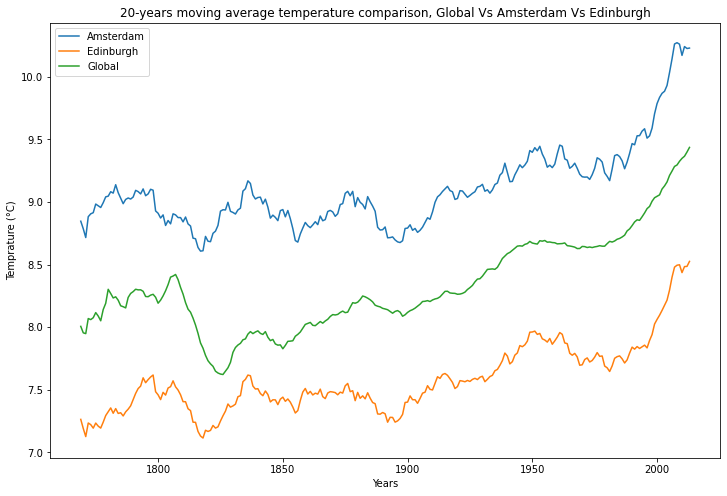

In [123]:
plt.figure(figsize=(12,8))
ax1=plt.subplot(1,1,1)

plt.plot(amsterdam_data.year, amsterdam_data.twenty_year_avg, label="Amsterdam")
plt.plot(edinburgh_data.year, edinburgh_data.twenty_year_avg, label="Edinburgh")
plt.plot(edinburgh_data.year, edinburgh_data.twenty_year_avg_global, label="Global")

plt.legend(loc="upper left")
plt.xlabel('Years')
plt.ylabel('Temprature (°C)')
plt.title('20-years moving average temperature comparison, Global Vs Amsterdam Vs Edinburgh')